In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl

import seaborn as sns
import altair as alt
from vega_datasets import data

%load_ext autoreload
%autoreload 2

alt.renderers.enable('notebook')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
sns.set_style=('white')
sns.despine()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def demo_plot(steps=20):
    # Initialize
    start = [100]
    N = [0]

    rs = np.random.RandomState(9)
    x, y = rs.multivariate_normal([0,0], [(1, 0), (0, 2)], 100).T
    x1, y1 = rs.multivariate_normal([80,70], [(1, 0), (0, 2)], 100).T

    for n in range(steps):

        plt.subplot(121)
        sns.despine()
        
        # Calculate next step of performance. 
        # Here is where the actual output of the model will be placed
        start.append(start[n]-np.random.random(1)[0]*3)
        N.append(n)
        
        # plot performance
        plt.plot(N,start,'r-')
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.title('Performance '+str(np.round(start[n],2)))

        plt.subplot(122)
        sns.despine()
        
        # Calculate next step of clusters
        x += np.random.random(size=x.shape)*2
        y += np.random.random(size=y.shape)*2

        x1 -= np.random.random(size=x1.shape)*2
        y1 -= np.random.random(size=y1.shape)*2
        
        # plot the clusters
        plt.plot(x, y, '.')
        plt.plot(x1, y1, '.')
        plt.xlim(0,100)
        plt.ylim(0,100)

        # Update the display
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
        
        # Add close, so it runs faster and the final plot isn't made cuz we don't need that in our life
        plt.close()


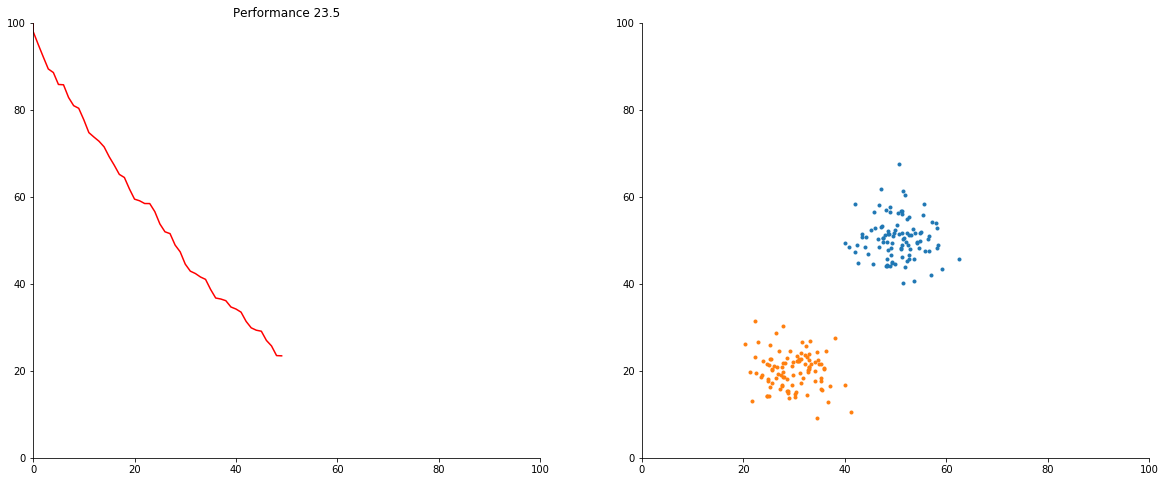

In [5]:
demo_plot(50)

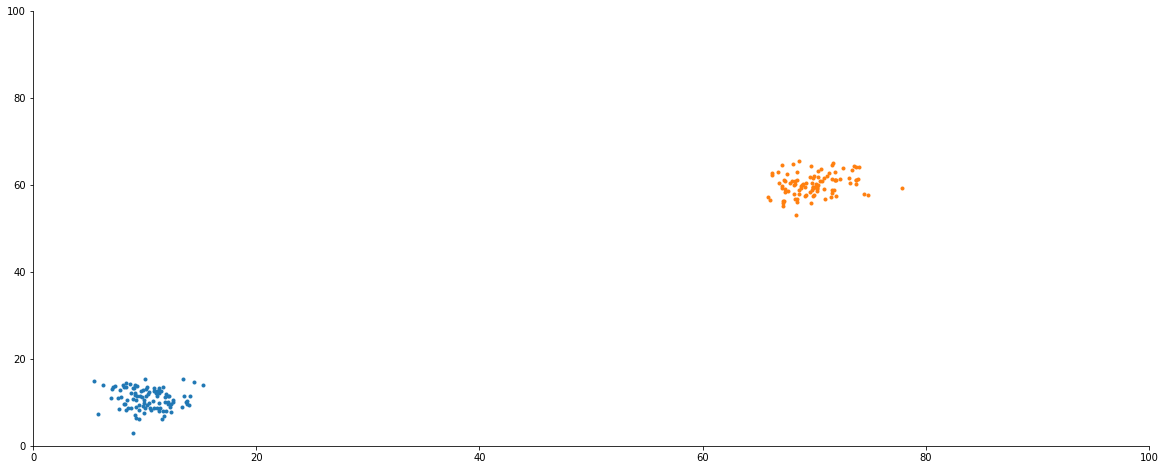

In [9]:
n=9
rs = np.random.RandomState(n)
mean = [np.random.random(1)[0], np.random.random(1)[0]]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T
x1, y1 = rs.multivariate_normal([80,70], cov, 100).T

for n in range(10):
    x += np.random.random(size=x.shape)*2
    y += np.random.random(size=y.shape)*2
    
    x1 -= np.random.random(size=x1.shape)*2
    y1 -= np.random.random(size=y1.shape)*2
    plt.plot(x, y, '.')
    plt.plot(x1, y1, '.')
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.xlim(0,100)
    plt.ylim(0,100)
    sns.despine()
    display.clear_output(wait=True)
    display.display(pl.gcf())
#     if n % 2:
    plt.close()
#     time.sleep(.01)

Dancing violin plots

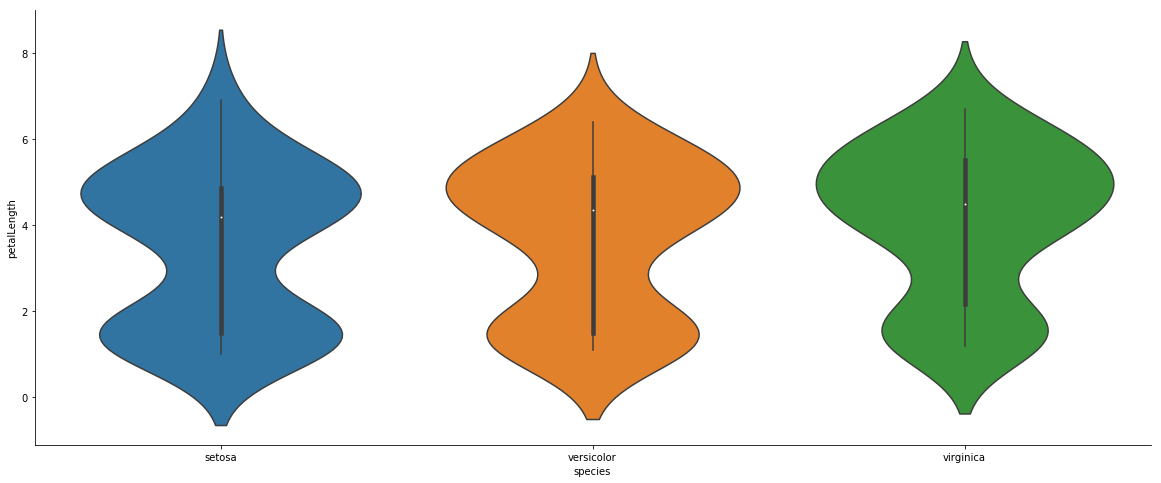

In [10]:
dataset = data.iris()
x = dataset['petalLength'].copy()
y = dataset['species'].copy()

for n in range(50):
    np.random.shuffle(y)

#     data['species/'] *= np.random.random(1)[0]
    sns.violinplot(x=y, y=x, order=np.unique(y))
    sns.despine()
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.close()

Groovy

## Trying that shit with roving balls

In [34]:
from olac.data_generators import roving_balls

[autoreload of olac.vis failed: Traceback (most recent call last):
  File "/Users/sgroothuis/Documents/Projecten/JADS/olac/venv/olac/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sgroothuis/Documents/Projecten/JADS/olac/venv/olac/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/sgroothuis/Documents/Projecten/JADS/olac/venv/olac/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/sgroothuis/Documents/Projecten/JADS/olac/venv/olac/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", l

In [35]:
roving_balls(steps=10)

<generator object roving_balls at 0x122ac0830>

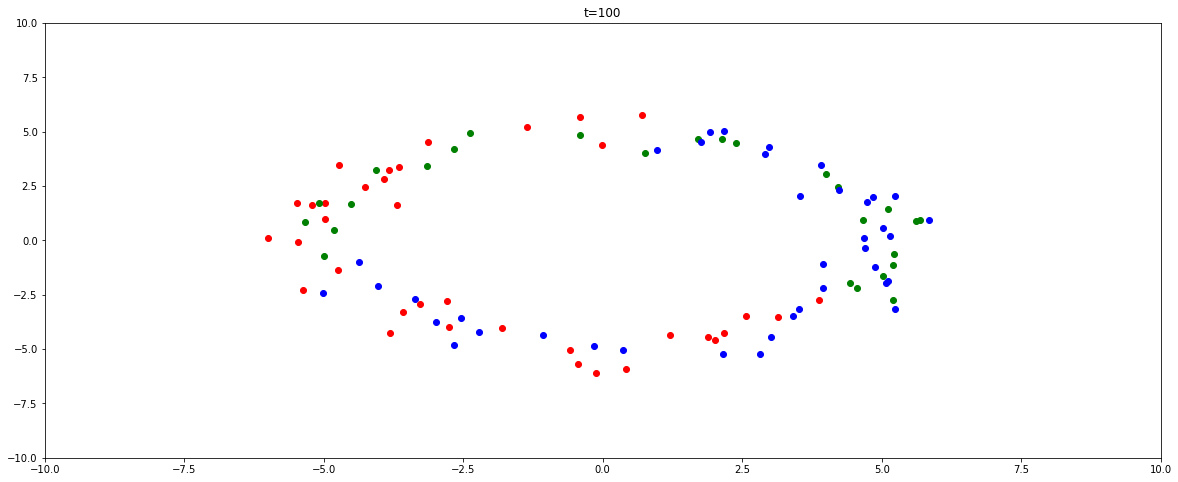

In [53]:

for t, x in enumerate(roving_balls(balls=3, steps=100,
                                   period=150, radius=4,
                                   vars=0.5, center=(1,1))):
    plt.scatter(*x[:2], color=['r','b','g'][int(x[-1])])
    plt.title(f't={t}')
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    display.clear_output(wait=True)
    display.display(plt.gcf())
plt.close()

In [60]:
from olac.perceptron import Perceptron as pc

In [108]:

def test_model(model, weights):
    x0, w1, b1, w2, b2 = weights
#     model = MODEL()
    return model.predict(x0, w1, b1, w2, b2)

wghts = X[0,:2], w1, b1, w2, b2
test_model(pc.Perceptron(), wghts)

array([[0.00017363]])

## w perceptron

Load perceptron function and generate data

In [16]:
import olac.perceptron as pc
X, yhat = pc.generate_data(int(1e4))

Train network.

In [18]:
X.shape

(10000, 2)

In [20]:
yhat[:,0]

array([0., 0., 0., ..., 1., 1., 1.])

In [17]:
w1, b1, w2, b2, costs, y_hat_saved = pc.train_network(X, yhat, 0.0001, 400, 4)

IndexError: tuple index out of range

For the trained network, create updating plot that shows the accuracy vs the predictions over time

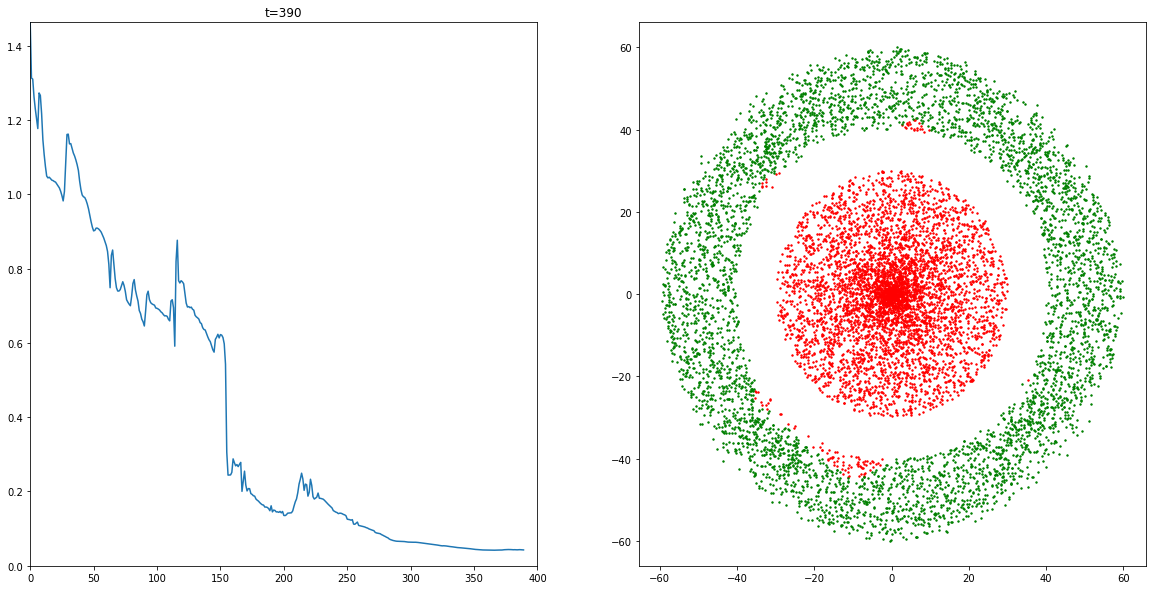

In [265]:

for t, x in enumerate(costs):
    if t % 10 ==0:
        plt.figure(figsize = (20, 10))
        plt.subplot(121)
        plt.plot(costs[:t])
        plt.xlim(0, len(costs))
        plt.ylim(0, max(costs))
        plt.title(f't={t}')
        plt.subplot(122)
        plt.scatter(*X[y_hat_saved[t].astype(np.bool)].T, color='r', s=2)
        plt.scatter(*X[~y_hat_saved[t].astype(np.bool)].T, color='g', s=2)

        display.clear_output(wait=True)
        display.display(plt.gcf())
    plt.close()

Try with moving data

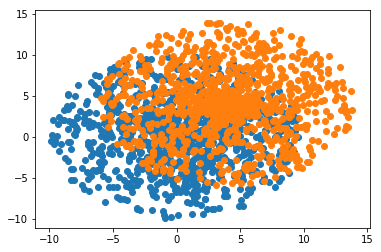

In [215]:
plt.scatter(*pc.rand_cluster(1000, (0,0), 10).T)
plt.scatter(*(pc.rand_cluster(1000, (0,0), 10)+np.array((4,4)).T).T)

Train model on first set of clusters

In [95]:
import olac.vis as vis
import olac.perceptron as pc
import olac.data_simulation.popping_clusters as pp

In [22]:
PP_data = pd.DataFrame(pp.cluster_generator(3, dt = 0.0001, cluster_width=50))
PP_data['time2'] = PP_data['time'].round(1)

We make more than two clusters, but we only train on two of them to introduce _unknown_ points to the model.

In [25]:
 PP_data.loc[PP_data['time2']<.1,['cluster_name']].values[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
w1, b1, w2, b2, costs, y_hat_saved = pc.train_network(PP_data.loc[PP_data['time2']<.1,['x','y']].values,
                                                      PP_data.loc[PP_data['time2']<.1,['cluster_name']].values,
                                                      0.0001, 200, 3)

Training accuracy after epoch 0: 96.6068%
Training accuracy after epoch 10: 100.0000%
Training accuracy after epoch 20: 100.0000%
Training accuracy after epoch 30: 100.0000%
Training accuracy after epoch 40: 100.0000%
Training accuracy after epoch 50: 100.0000%
Training accuracy after epoch 60: 100.0000%
Training accuracy after epoch 70: 100.0000%
Training accuracy after epoch 80: 100.0000%
Training accuracy after epoch 90: 100.0000%
Training accuracy after epoch 100: 100.0000%
Training accuracy after epoch 110: 100.0000%
Training accuracy after epoch 120: 100.0000%
Training accuracy after epoch 130: 100.0000%
Training accuracy after epoch 140: 100.0000%
Training accuracy after epoch 150: 100.0000%
Training accuracy after epoch 160: 100.0000%
Training accuracy after epoch 170: 100.0000%
Training accuracy after epoch 180: 100.0000%
Training accuracy after epoch 190: 100.0000%
Training accuracy after epoch 199: 100.0000%


Check the current prediction of the model and the decision boundary.

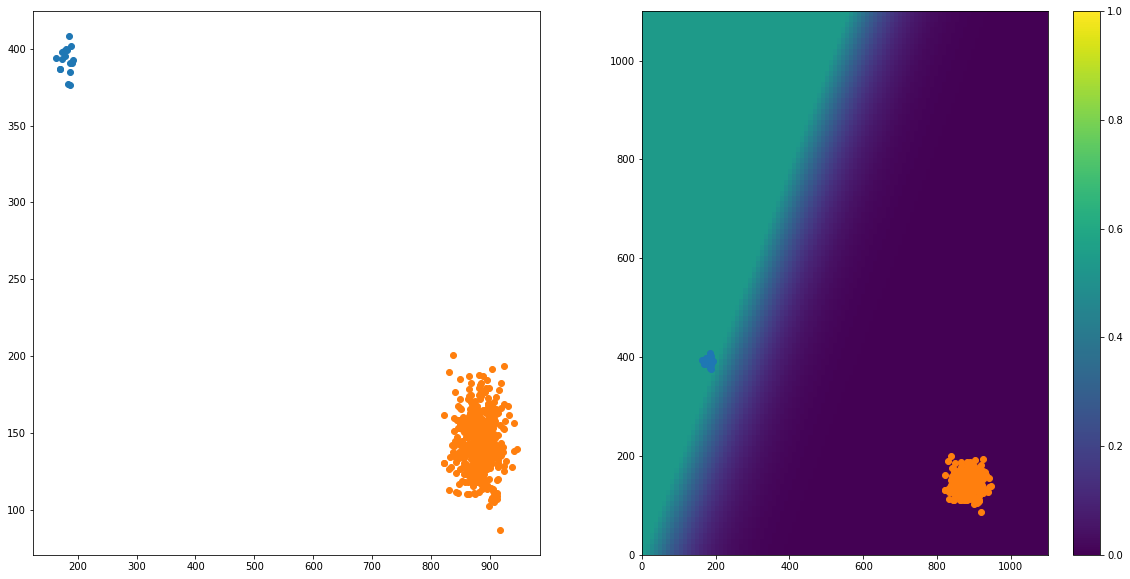

In [28]:
plt.figure(figsize=(20,10))
train = PP_data.loc[PP_data['time2']<.1,['x','y']].values

plt.subplot(121)
plt.scatter(*train[y_hat_saved[199]==1].T)
plt.scatter(*train[y_hat_saved[199]==0].T)

lab_train = PP_data.loc[PP_data['time2']<.1,['cluster_name']].values
plt.subplot(122)
plt.scatter(*train[lab_train[:,0]==1].T)
plt.scatter(*train[lab_train[:,0]==0].T)

x1 = np.linspace(0,1100,100)
x2 = np.linspace(0,1100,100)
fun_map = np.empty((x1.size, x2.size))
for n,i in enumerate(x1):
    for m,j in enumerate(x2):
        fun_map[m,n] = pc.prediction([i,j], w1, b1, w2, b2)

#             plt.subplot(int(np.round(nr_epochs/10/2))+2,2,s)
plt.imshow(fun_map, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
           vmin=0, vmax=1, aspect='auto', origin='lower')
plt.colorbar()

Plot the model results as new clusters are introduced along with the accuracy

In [185]:
new_pred = []
new_acc = []

i = 1
step_size = 500
for m in np.arange(10, int(len(PP_data['time'])/step_size)):

    t = PP_data.loc[m*step_size, 'time']
    t2 = PP_data.loc[(m-10)*step_size, 'time']
    X = PP_data.loc[(PP_data['time'] <= t )&(PP_data['time'] >= t2),['x','y']].values
    labels = PP_data.loc[(PP_data['time'] <= t)&(PP_data['time'] >= t2) ,['cluster_name']].values

    new_pred, acc = vis.get_new_accuracy(X, labels, weights = (w1, b1, w2, b2))
    new_acc.append(acc)
    
    plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.plot(np.arange(0, i), new_acc)
    plt.xlim(0, int(len(PP_data['time'])/step_size))
    plt.ylim(0, 1.1)

    plt.title('Accuracy {:.4%}'.format(np.equal(new_pred, labels[:,0]).mean()))
    
    
    plt.subplot(122)

    plt.scatter(*X[new_pred==1,:].T, color='b', alpha=.3)
    plt.scatter(*X[new_pred==0,:].T, color='w', alpha=.3)
    plt.scatter(*X[new_pred!=labels[:,0],:].T, color='r')
    x1 = np.linspace(0,1000,100)
    x2 = np.linspace(0,1000,100)
    
    fun_map = np.empty((x1.size, x2.size))
    for nn,ii in enumerate(x1):
        for mm,jj in enumerate(x2):
            fun_map[mm,nn] = pc.prediction([ii,jj], w1, b1, w2, b2)

    plt.imshow(fun_map, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
               vmin=0, vmax=1, aspect='auto', origin='lower')
    plt.title('Step: {}'.format(m))
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    
    
    display.clear_output(wait=True
    display.display(plt.gcf())
    i+=1
    plt.close()

SyntaxError: invalid syntax (<ipython-input-185-bc2955a0b66f>, line 46)

In [182]:
X[:,0]

array([-4.43512483, -4.70411419, -3.65928341, -4.37043267,  3.52041433,
       -3.15915451, -0.47174067, -3.86618425, -4.48885865,  5.35329819,
       -2.41680974, -1.72280608,  5.45935938,  5.27325742, -2.62228638,
       -2.13866651, -2.17643782, -2.81460208,  4.74901803, -3.41599059,
        4.72520604,  4.64543152, -3.45811964, -2.2830156 , -3.32714059,
       -1.39441438, -4.29752599, -4.8973761 ,  4.65263732,  4.8104882 ,
        4.1705598 , -0.16945313,  4.0261275 , -0.1473177 , -4.14781049,
        3.40546999,  3.53625277, -4.86146971, -5.7333056 ,  2.99416981,
       -4.29935446,  3.12592203,  3.39918276, -4.40987776,  1.68173905,
       -4.60762862,  1.52790247,  1.22429353,  3.49919907,  2.88877972,
       -5.02578261, -4.51628293,  0.61007564, -4.62084493,  0.0365401 ,
        0.01647441, -3.9641254 ,  4.23755232, -0.78942867, -3.64240637,
       -1.27859405,  5.23467929, -3.15764159, -3.04077227,  5.50220813,
       -2.51377761,  5.41884925, -2.10535435,  4.79950965,  4.91

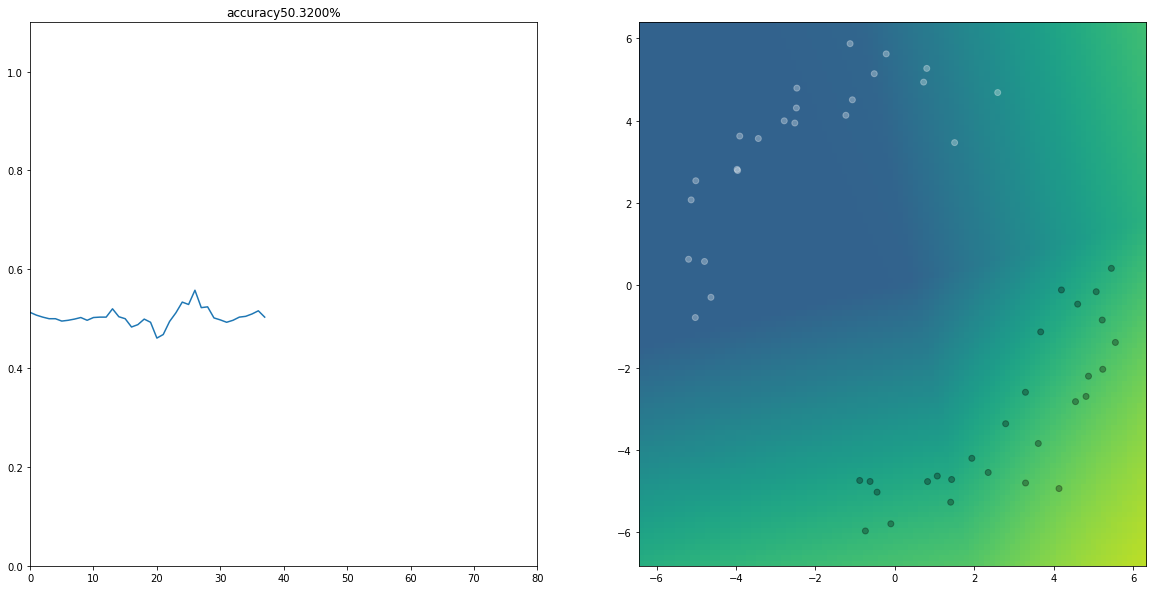

KeyboardInterrupt: 

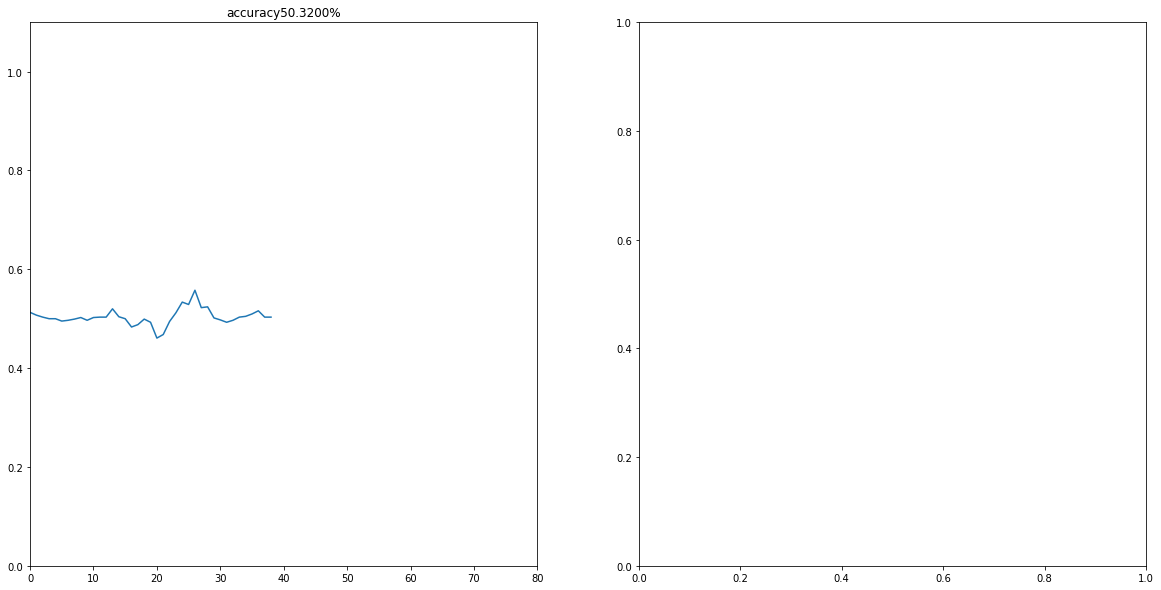

In [203]:
vis.main_function(pc.Perceptron(), roving_balls, 2000, 'accuracy',
                window=50, balls=2, period=150, radius=4,
                                   vars=0.5, center=(1,1))

In [151]:
np.arange()

array([1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1])

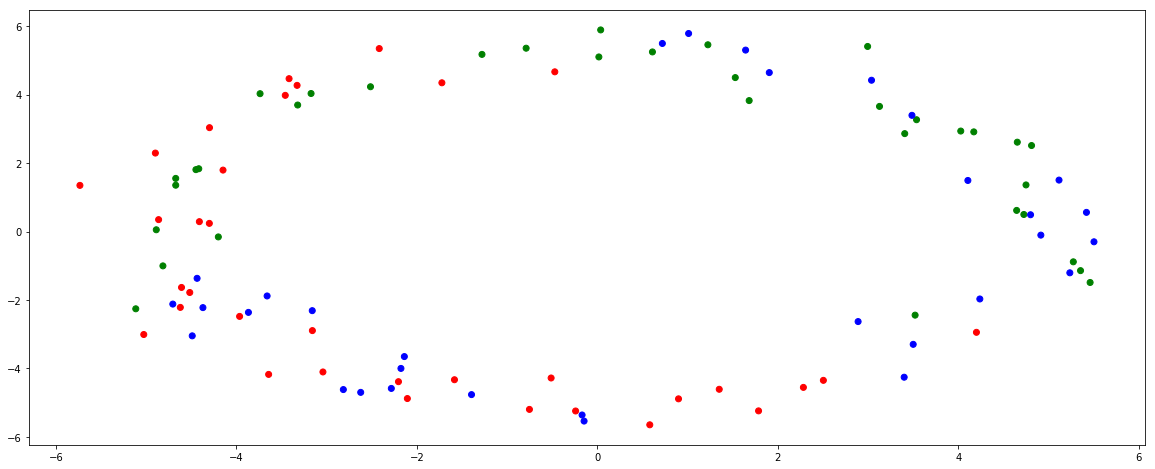

In [170]:
# ['r','g','b'][m_lab.astype(int)[:,None]]
plt.scatter(*X.T, color =[{0:'r',1:'b',2:'g'}[i] for i in m_lab.astype(int)])

In [171]:
m_lab.shape

(101,)

In [124]:
data = np.array(list(roving_balls(balls=3, steps=100,
                                   period=150, radius=4,
                                   vars=0.5, center=(1,1))))

In [119]:
xx = data[:, :2]
labx = data[:,-1]
xx[:100]
labx[:100]

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 2., 1., 2., 0., 0., 1., 0., 0.,
       2., 0., 0., 1., 0., 1., 2., 2., 2., 1., 1., 0., 0., 1., 1., 1., 0.,
       2., 1., 0., 1., 1., 0., 1., 0., 2., 0., 0., 2., 0., 1., 2., 2., 1.,
       2., 1., 2., 0., 2., 0., 1., 2., 0., 2., 0., 0., 2., 0., 0., 0., 1.,
       2., 2., 1., 1., 2., 2., 1., 0., 2., 2., 1., 2., 2., 1., 1., 0., 1.,
       0., 1., 2., 1., 0., 1., 1., 2., 0., 2., 2., 1., 2., 0., 1.])

In [122]:
labx[2:20+2]

array([1., 1., 1., 1., 0., 1., 0., 2., 1., 2., 0., 0., 1., 0., 0., 2., 0.,
       0., 1., 0.])